<a href="https://colab.research.google.com/github/rimgosu/ColabBackup/blob/master/ex01_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자
- 딥러닝으로 이진분류 실습을 진행하자

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer # 사이킷런 내장 유방암 데이터
breast_data = load_breast_cancer()
print(breast_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
breast_data.keys()
# data : 문제데이터, 입력특성
# target : 정답데이터
# target_names : 정답데이터의 이름

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 정답데이터 확인
breast_data.target_names
# 0 == malignant (악성)
# 1 == benign (양성)
# 클래스 개수 : 2개 => 이진분류

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# 문제, 정답 분리
# 문제 X, 정답 y
X = pd.DataFrame(breast_data.data)

y = pd.DataFrame(breast_data.target)
X, y

(        0      1       2       3        4        5        6        7       8   \
 0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
 1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
 2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
 3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
 4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
 ..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
 564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
 565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
 566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
 567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
 568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   
 
           9  

In [ ]:
# train, test 분리
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455, 1)
(114, 30) (114, 1)


### 모델링 과정
1. 신경망 구조 설계(뼈대, 입력층, 중간층, 출력층)
2. 신경망 모델 학습/평가 방법 설정(회귀, 분류)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation

In [ ]:
# 뼈대 생성
model = Sequential()
# 입력층
model.add(InputLayer(input_shape=(30,)))
# 중간층 (은닉층)
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
# 출력층 : 출력받고 싶은 데이터의 형태 지
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from scipy import optimize
# 손실함수로 cross entropy 사용
# 이진분류이기 때문에 binary_crossentropy
model.compile(
    loss='binary_crossentropy',
    optimizer='SGD',
    metrics=['accuracy'] # 평가방법(분류 : 정확도)
)

In [ ]:
h1 = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 49ms/step - loss: 0.6624 - accuracy: 0.6429 - val_loss: 0.6717 - val_accuracy: 0.5714
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6429 - val_loss: 0.6598 - val_accuracy: 0.5714
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.6429 - val_loss: 0.6725 - val_accuracy: 0.5714
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6400 - accuracy: 0.6429 - val_loss: 0.6744 - val_accuracy: 0.5714
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6432 - accuracy: 0.6429 - val_loss: 0.6689 - val_accuracy: 0.5714
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6400 - accuracy: 0.6429 - val_loss: 0.6825 - val_accuracy: 0.5714
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6470 - accuracy: 0.6429 - val_loss: 0.6679 - val_accuracy: 0.5714
Epoch 8/100


In [ ]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.6200 - accuracy: 0.6228


[0.6199586391448975, 0.6228070259094238]

In [ ]:
h1.history

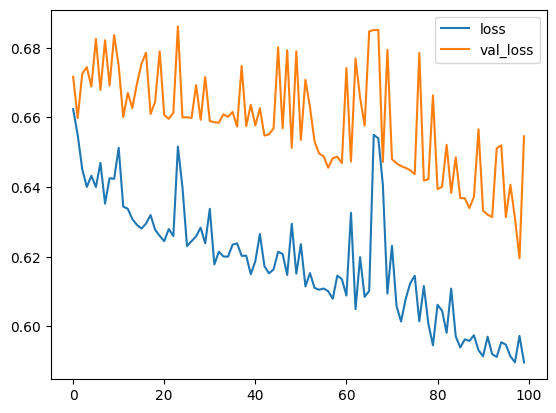

In [ ]:
# 결과 시각화
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                496       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
